<a href="https://colab.research.google.com/github/d0k7/R-for-Data-Science-Lab/blob/main/R_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages(c("tm", "NLP", "SentimentAnalysis", "syuzhet", "ggplot2", "twitteR", "RCurl", "tidytext"))


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘tau’, ‘foreach’, ‘shape’, ‘RcppEigen’, ‘lars’, ‘randomForest’, ‘SnowballC’, ‘Rcpp’, ‘slam’, ‘BH’, ‘qdapDictionaries’, ‘ngramrr’, ‘moments’, ‘stringdist’, ‘glmnet’, ‘spikeslab’, ‘textshape’, ‘zoo’, ‘dtt’, ‘rjson’, ‘bitops’, ‘janeaustenr’, ‘tokenizers’




Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
“EOF within quoted string”


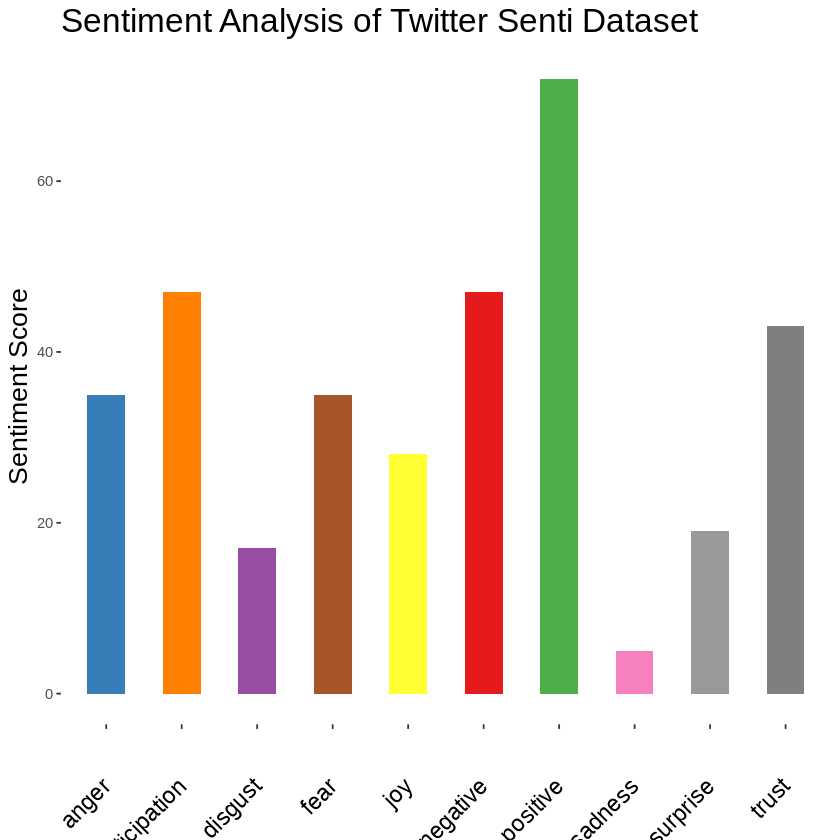

In [ ]:
library(tm)
library(NLP)
library(SentimentAnalysis)
library(syuzhet)
library(ggplot2)
library(twitteR)
library(RCurl)
library(tidytext)

tweets <- read.csv("/content/Twitter Senti.csv")

# create a function to clean each tweet
clean_tweet <- function(tweet) {
  # remove RT and via
  tweet <- gsub("(RT|via)[:blank:]+", "", tweet)
  # remove URLs
  tweet <- gsub("http\\S+|www\\S+", "", tweet)
  # remove @mentions
  tweet <- gsub("@\\S+", "", tweet)
  # remove punctuation
  tweet <- gsub("[[:punct:]]", "", tweet)
  # remove numbers
  tweet <- gsub("[[:digit:]]", "", tweet)
  # remove whitespace
  tweet <- gsub("\\s+", " ", tweet)
  # trim leading/trailing whitespace
  tweet <- trimws(tweet)
  return(tweet)
}

# apply the clean_tweet function to each tweet in the dataset
tweets$clean_text <- sapply(tweets$text, clean_tweet)

# get sentiment scores for each tweet
sentiment <- get_nrc_sentiment(tweets$clean_text)
sentiment_scores <- data.frame(colSums(sentiment))
names(sentiment_scores) <- "Score"

# add sentiment categories as a column to the sentiment scores dataframe
sentiment_scores$sentiment <- rownames(sentiment_scores)
rownames(sentiment_scores) <- NULL

# plot sentiment scores
ggplot(data = sentiment_scores, aes(x = sentiment, y = Score, fill = sentiment)) +
  geom_bar(stat = "identity", width = 0.5) +
  scale_fill_manual(values = c("positive" = "#4daf4a", "negative" = "#e41a1c", "anger" = "#377eb8", "anticipation" = "#ff7f00", "disgust" = "#984ea3", "fear" = "#a65628", "joy" = "#ffff33", "sadness" = "#f781bf", "surprise" = "#999999")) +
  theme(plot.background = element_rect(fill = "white", size = 2, linetype = "solid"),
        panel.background = element_rect(fill = "white", size = 2, linetype = "solid"),
        axis.text.x = element_text(angle = 45, vjust = 0.5, hjust = 1, color = "black", size = 14),
        axis.title.x = element_blank(),
        axis.title.y = element_text(color = "black", size = 16),
        legend.position = "none") +
  xlab("Sentiment Category") +
  ylab("Sentiment Score") +
  ggtitle("Sentiment Analysis of Twitter Senti Dataset") +
  theme(plot.title = element_text(size = 20))
